<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/wine.csv")

In [ ]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [ ]:
df.dtypes

,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64


In [ ]:
def remove_outliers(df):
  for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]
  return df

df_clean = remove_outliers(df)

In [ ]:
df_clean

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


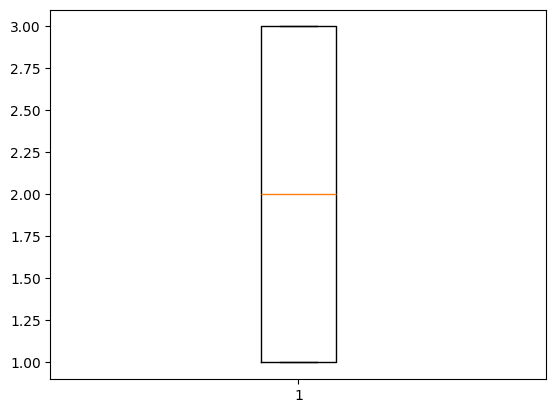

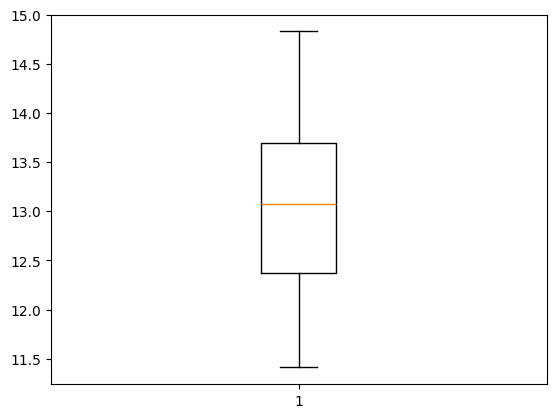

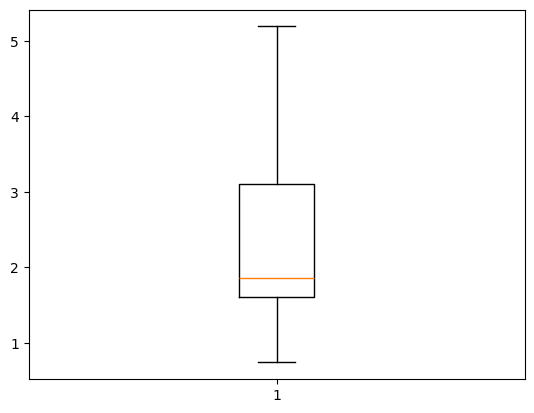

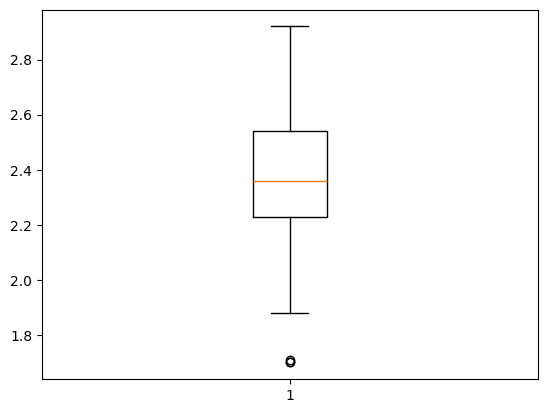

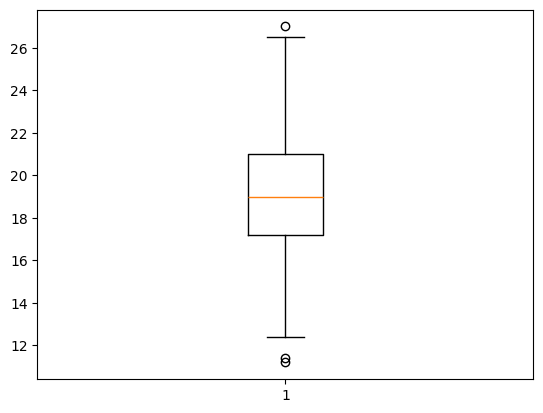

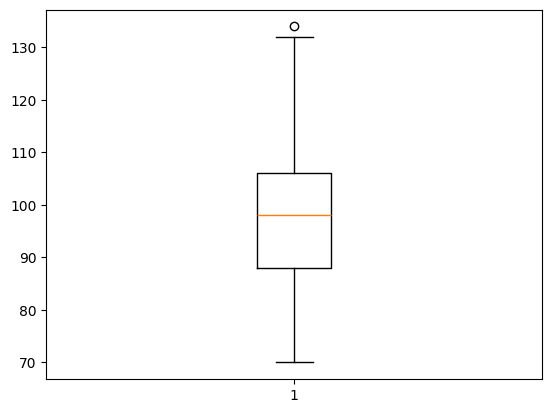

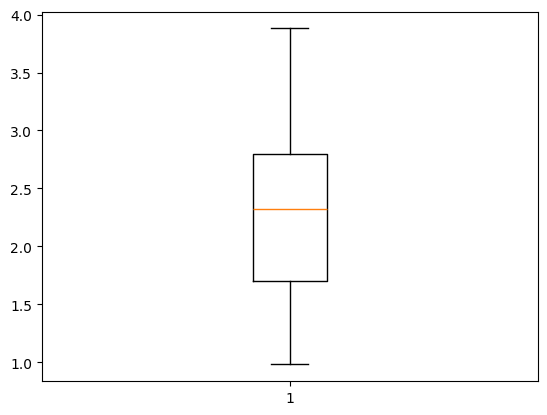

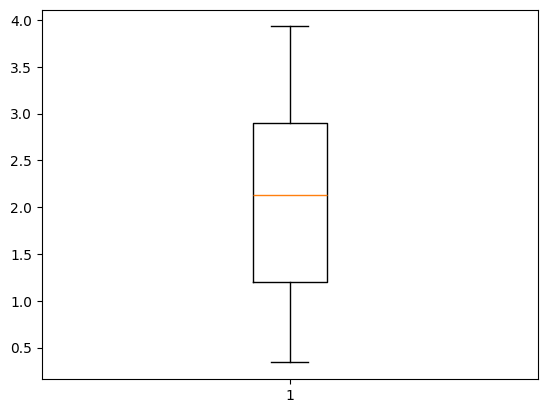

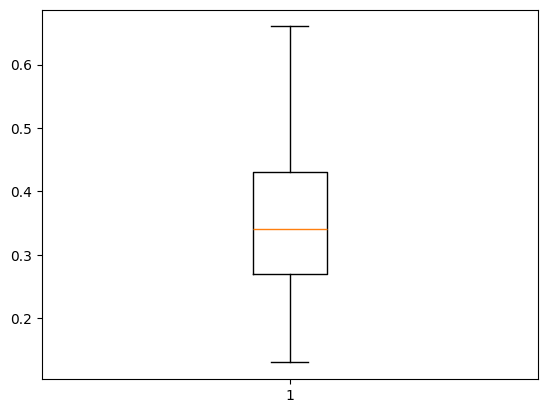

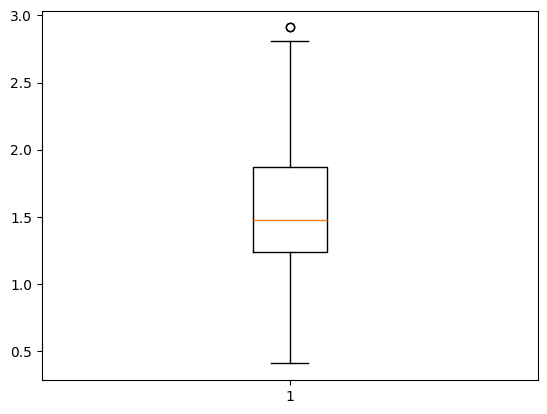

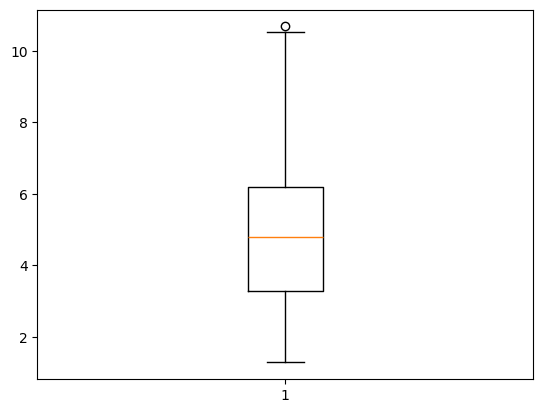

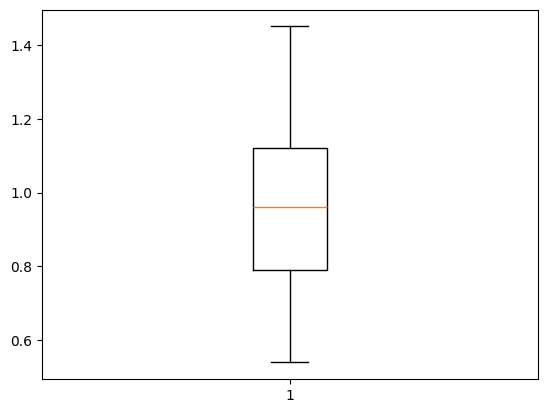

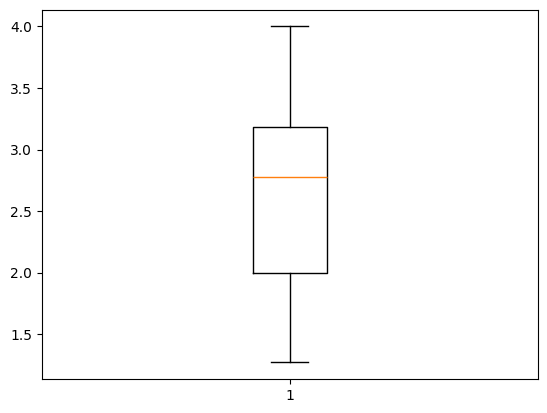

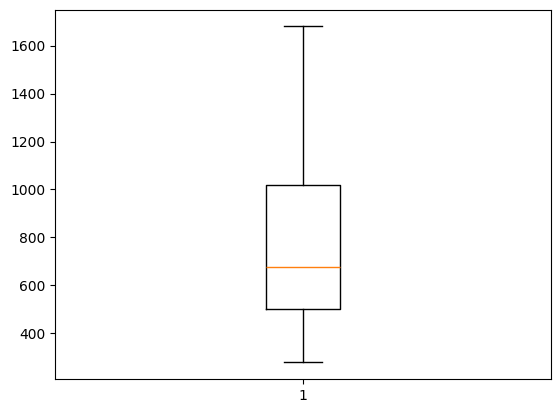

In [ ]:
col = df_clean.columns
for i in col:
  plt.boxplot(df_clean[i])
  plt.show()


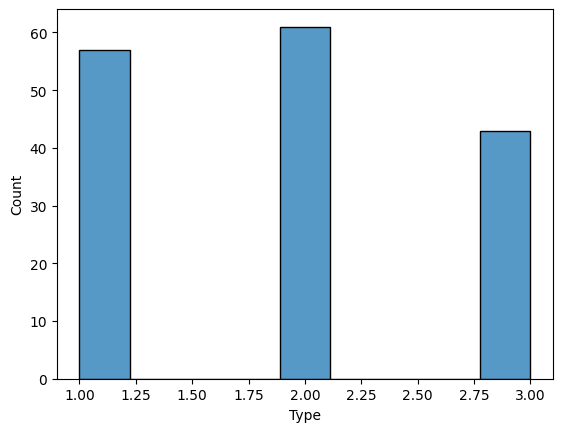

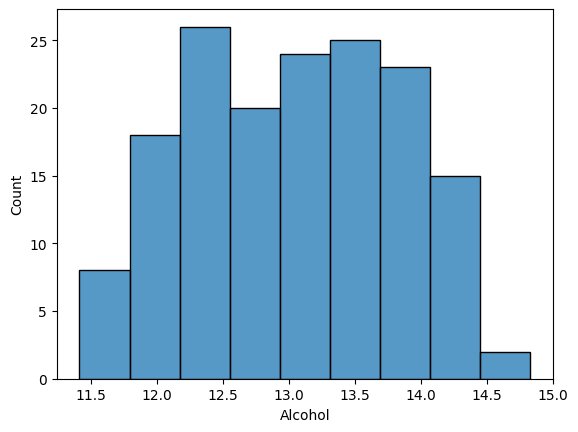

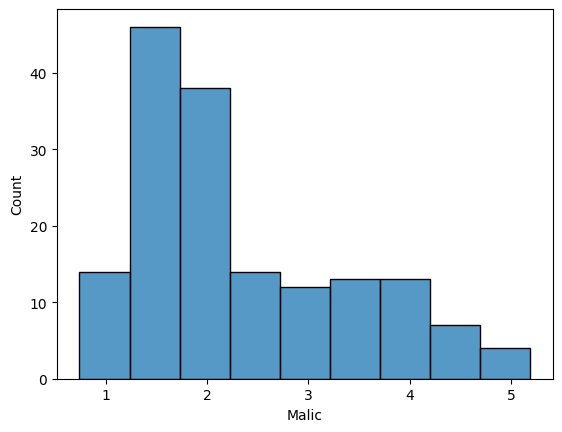

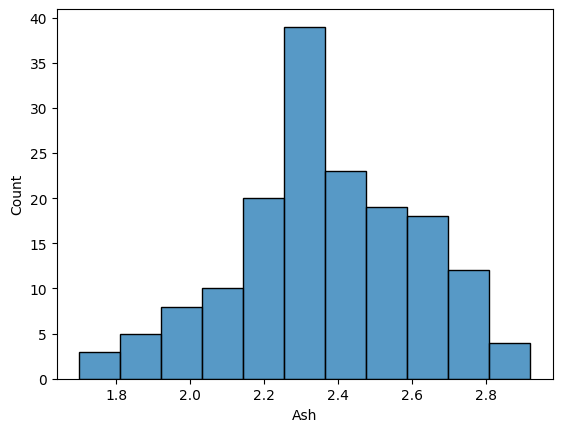

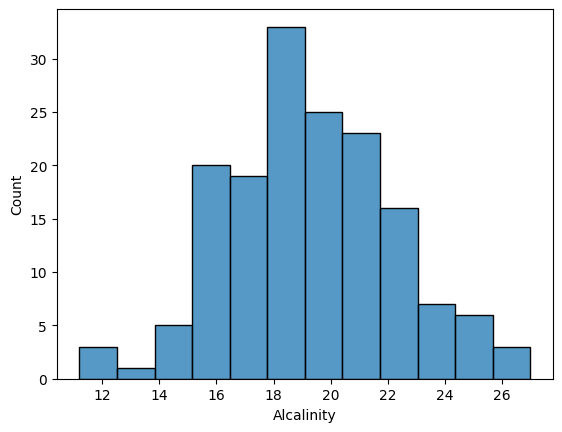

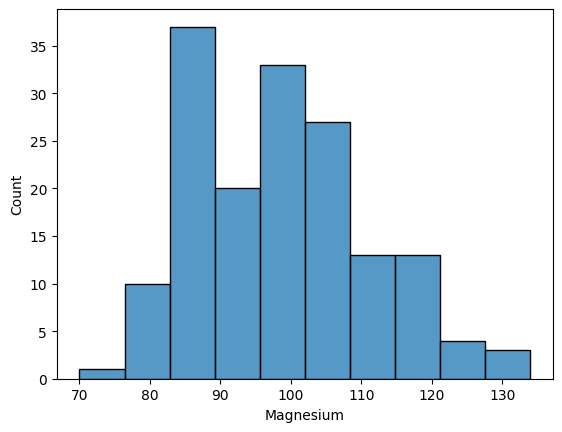

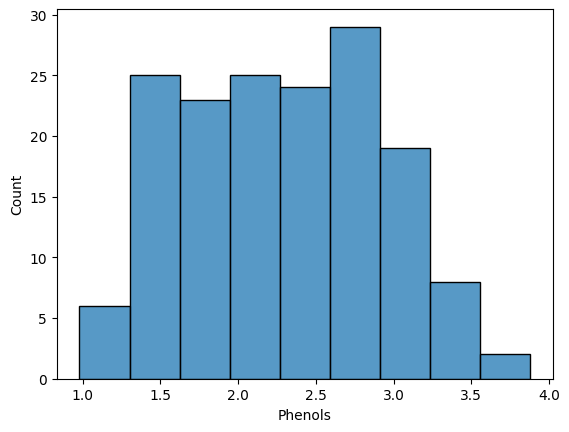

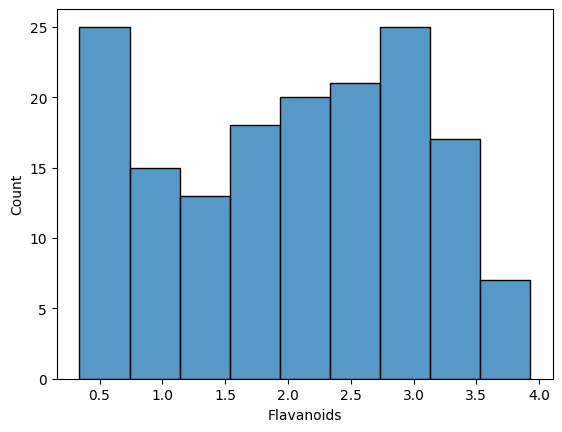

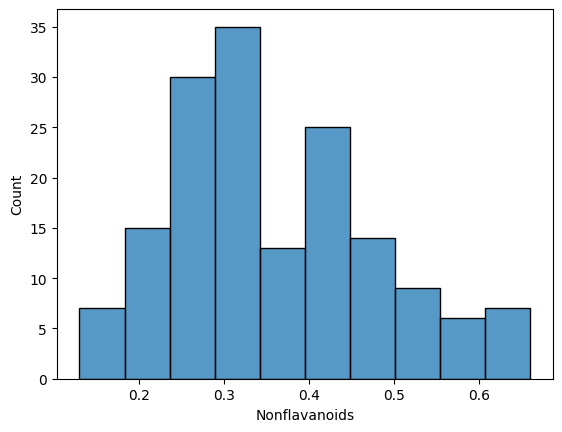

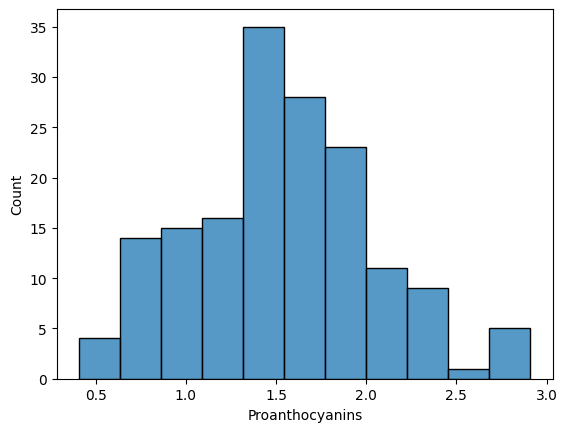

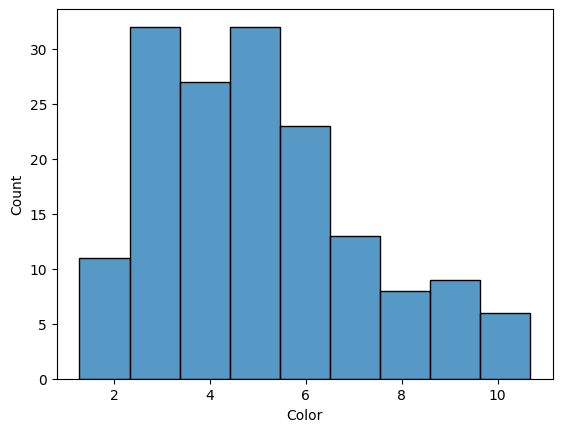

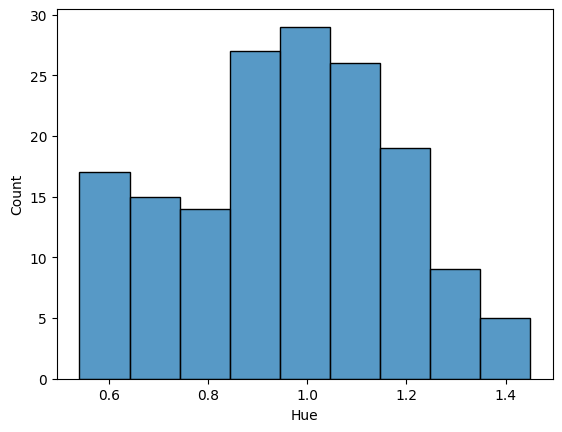

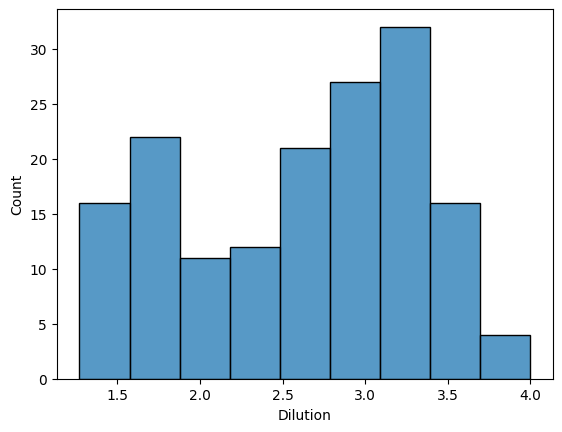

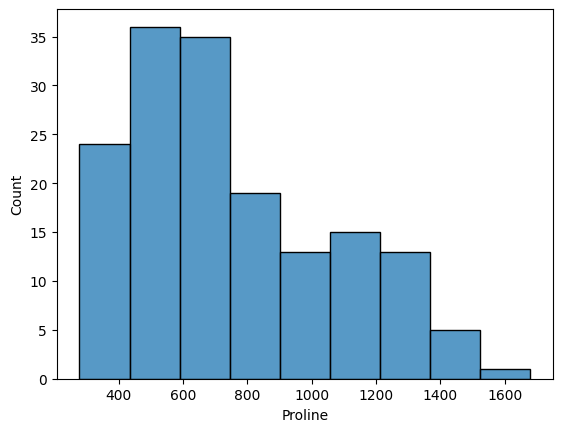

In [ ]:
import seaborn as sns
col = df_clean.columns
for i in col:
  sns.histplot(df_clean[i])
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
df_scaled=scaler.fit_transform(df_clean)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = df_clean.columns)

In [ ]:
df_scaled

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.165639,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,-1.165639,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,-1.165639,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,-1.165639,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,-1.165639,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.387666,1.426439,0.182645,0.478259,0.235886,-0.613945,-0.957620,-1.356232,0.666936,-0.583238,2.171785,-1.554828,-1.279371,-0.296123
157,1.387666,0.463146,1.515815,0.478259,1.247725,0.275823,-0.766235,-1.305127,0.584592,-0.251362,1.054728,-1.185655,-1.490285,-0.012057
158,1.387666,0.298372,1.868152,-0.433962,0.235886,1.731807,-1.101159,-1.366453,0.584592,-0.368495,2.404505,-1.693268,-1.490285,0.256228
159,1.387666,0.171623,0.258826,0.022149,0.235886,1.731807,-1.005466,-1.376675,1.408032,-0.153752,1.985609,-1.647122,-1.405919,0.272009


In [ ]:
from sklearn.decomposition import PCA
# PCA reduces the number of features in your dataset while keeping the most important patterns (variance) in the data.
pca=PCA()

pca_df = pca.fit_transform(df_scaled)

In [ ]:
pca_df

array([[ 3.68044981,  1.62076548,  0.01296204, ...,  0.63862966,
         0.43142558,  0.18758678],
       [ 2.61731972, -0.325936  , -1.96658406, ...,  0.33124032,
         0.02112602,  0.09401638],
       [ 2.90167455,  0.94319141,  1.10621652, ..., -0.00607871,
        -0.01215849, -0.03086239],
       ...,
       [-3.00811197,  3.17455031, -1.03299059, ...,  0.54359394,
         0.04348784, -0.00516148],
       [-2.72229882,  2.64312221, -0.61171646, ...,  0.34546178,
         0.31500185,  0.06011962],
       [-3.52739641,  2.88217723,  0.98958305, ..., -0.01609194,
         0.03130101, -0.29034395]])

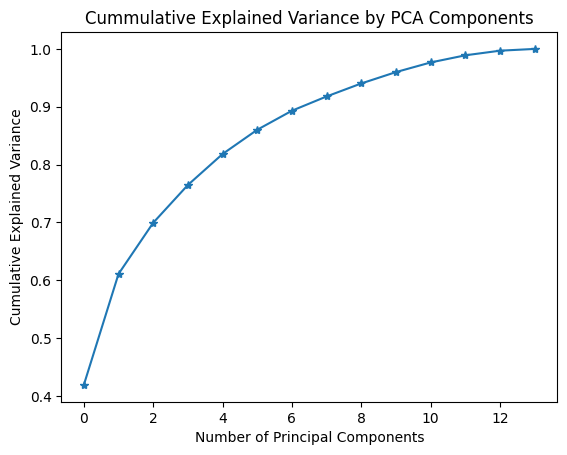

In [ ]:
# Scree plot

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='*')
plt.title('Cummulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# First 2 components:
# The curve rises sharply, meaning these components capture a large portion of the variance.

# After ~6 components:
# The curve starts to flatten, which means the additional components contribute less and less.

# Around 8–9 components:
# You're already capturing ~95–98% of the total variance


In [ ]:
# Keep 6 to 8 components — they explain most of the meaningful variance.

In [ ]:
pca=PCA(n_components = 6)
reduced_df = pca.fit_transform(df_scaled)

In [ ]:
reduced_df

array([[ 3.68044981e+00,  1.62076548e+00,  1.29620448e-02,
        -8.50799480e-02, -6.13201953e-01,  4.09313976e-01],
       [ 2.61731972e+00, -3.25936003e-01, -1.96658406e+00,
        -7.30791003e-01, -3.71671757e-01,  1.24081646e+00],
       [ 2.90167455e+00,  9.43191412e-01,  1.10621652e+00,
         1.03241709e+00,  7.49487360e-01, -6.11600469e-01],
       [ 4.05719928e+00,  2.72472233e+00, -1.90115501e-01,
         6.88531780e-01,  1.39685995e-01, -5.00454116e-01],
       [ 1.41287734e+00,  1.07218123e+00,  2.47077432e+00,
        -2.28413653e-01, -6.36556568e-02,  4.64815673e-01],
       [ 3.43723402e+00,  2.13787162e+00, -5.55420891e-01,
        -5.90466524e-01,  5.52482101e-01, -1.57954785e-01],
       [ 2.88297627e+00,  1.06459658e+00, -7.96728765e-01,
        -1.80450161e-01,  8.74022045e-01,  5.20079422e-01],
       [ 2.41503565e+00,  1.82530162e+00,  6.47179581e-01,
        -1.21782234e+00, -4.42059853e-01,  1.17795700e+00],
       [ 2.96487336e+00,  7.72752527e-01, -1.800

# **Clustering with Original Data:**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
wcss = []

for i in range (1,11):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

print(wcss)

[2253.9999999999995, 1525.3414494743733, 1084.3526634794182, 999.1767062027446, 951.1492970866652, 903.4940130312115, 860.1786783855948, 825.0378456929545, 798.7516404117956, 760.9503570779412]


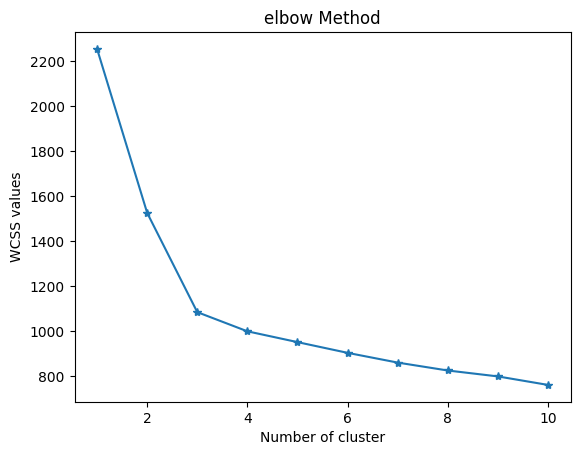

In [ ]:
plt.plot(range(1,11), wcss, marker='*')
plt.title("elbow Method")
plt.xlabel('Number of cluster')
plt.ylabel("WCSS values")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(df_scaled)

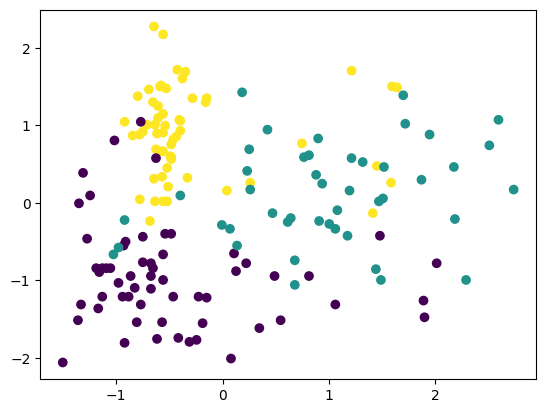

In [ ]:
plt.scatter(df_scaled['Malic'],df_scaled['Alcohol'], c=clusters, cmap='viridis')
plt.show()

In [ ]:
silhouette_score(df_scaled, clusters)

np.float64(0.32238554513044054)

# Clustering on PCA transformed data


In [ ]:
kmeans_pca=KMeans(n_clusters=3, random_state=42)
clusters_pca=kmeans_pca.fit_predict(reduced_df)

In [ ]:
silhouette_score(reduced_df, clusters_pca)

np.float64(0.3893488867656521)

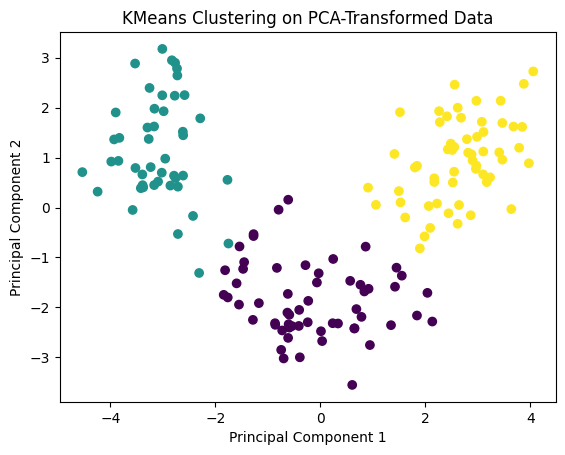

In [ ]:
plt.scatter(reduced_df[:,0], reduced_df[:,1], c=clusters_pca, cmap='viridis')
plt.title("KMeans Clustering on PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# Summary of Key Findings and Insights
# The assignment demonstrated how applying Principal Component Analysis (PCA) followed by clustering (KMeans) can simplify complex datasets and uncover hidden patterns.
#  PCA effectively reduced dimensionality while retaining essential variance, making the data more manageable and suitable for clustering.
#  However, the clustering quality (measured via silhouette score) did not always align with visual impressions from PCA plots,
#  highlighting the need for both visual and quantitative evaluation methods. This also revealed that visual separation does not always translate to strong cluster
#  performance in high dimensions.



# Practical Implications of Using PCA and Clustering in Data Analysis
# PCA is a powerful preprocessing step when dealing with high-dimensional, noisy, or highly correlated data.
# It improves algorithm efficiency and can prevent overfitting in models that are sensitive to feature relationships.

# Clustering helps in unsupervised pattern discovery, customer segmentation, anomaly detection, and exploratory data analysis.

# Combining both techniques allows analysts to work with simpler, cleaner representations of the data,
# although care must be taken to ensure important information is not lost in the PCA transformation.




# Avoid PCA:
# When feature interpretability is critical (e.g., healthcare, finance).
# If using tree-based models that already handle feature correlation well.